This notebook only makes a figure out of pre-computed behavior predictions.
It relies on finding a summary file in the `results` folder.

To recompute ad reproduce these results from scratch, one would need to run the following scripts:
1. `./scripts/chewie/extract_data.py` to save the ground truth data
2. `./scripts/chewie/run_biRNN_decoder.py` to save the results of the biRNN decoder 
3. `./scripts/chewie/run_avg_per_epoch.py` to save the trial-average per-condition predictions
4. LFADS / BAND
5. PSID
6. CEBRA

In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

from plot_helpers import get_trials2plot

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [11]:
path = '../../results/Chewie_CO_FF_2016-10-07.h5'
data = h5py.File(path, 'r')
data.keys()

<KeysViewHDF5 ['test_M1_birnn_pred', 'test_PMd_birnn_pred', 'test_all_birnn_pred', 'train_M1_birnn_pred', 'train_PMd_birnn_pred', 'train_all_birnn_pred', 'train_behavior', 'train_epoch', 'train_inds', 'train_target_direction', 'valid_behavior', 'valid_epoch', 'valid_inds', 'valid_target_direction']>

<IPython.core.display.Javascript object>

In [12]:
dset='valid'
vel = data[f'{dset}_behavior'][:]
target_direction = data[f'{dset}_target_direction'][:]
epoch = data[f'{dset}_epoch'][:]
pos = np.cumsum(vel*0.01,1)

<IPython.core.display.Javascript object>

In [5]:
dir_index = np.array([
        sorted(set(target_direction)).index(i) for i in target_direction
    ])

avg_pos_per_epoch = data['test_all_naive_pred']
avg_vel_per_epoch = data['test_all_naive_pred']


KeyError: "Unable to synchronously open object (object 'test_all_naive_pred' doesn't exist)"

In [6]:
trials2plot = np.array([get_trials2plot(vel, avg_vel, dir_index, epoch, i) for i in range(3)]).sum(0)
trials2plot.sum()

NameError: name 'avg_vel' is not defined

NameError: name 'avg_vel_per_epoch' is not defined

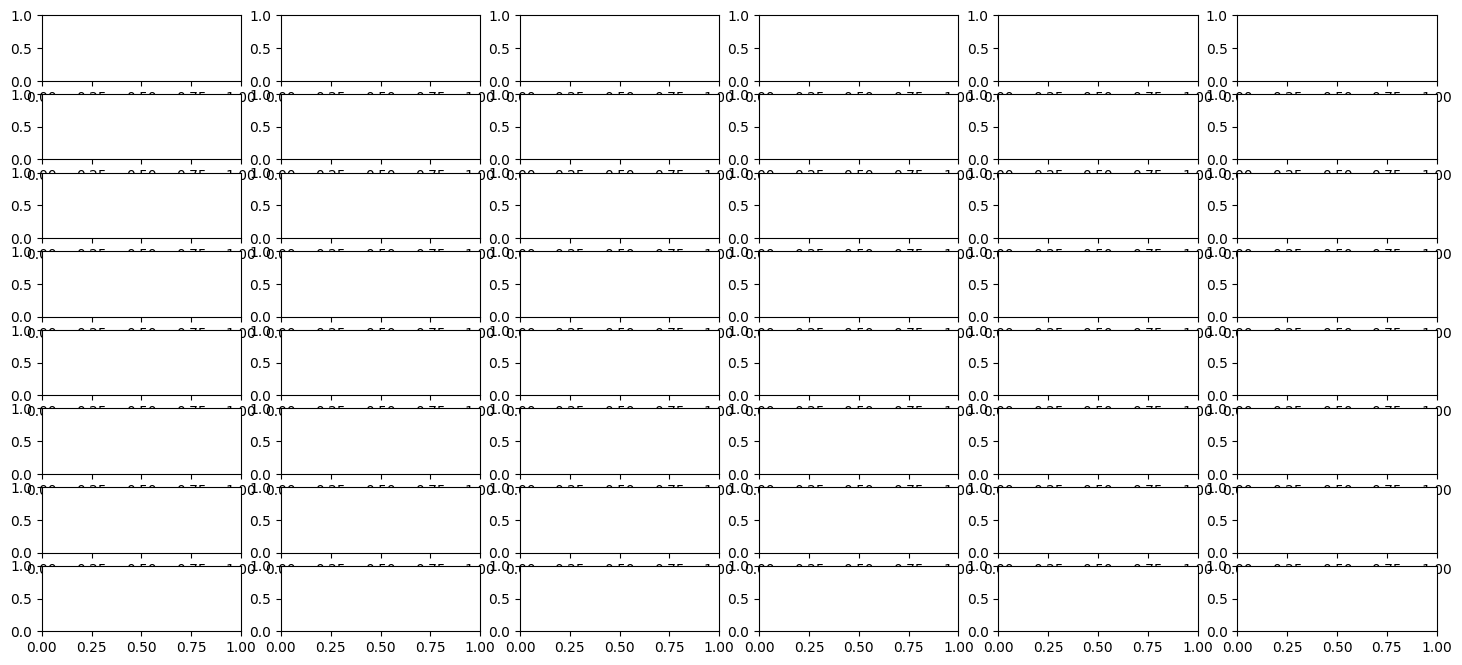

In [7]:
def plot_beh_pred(vel, pred_vel, dir_index, trials2plot, axes, component=0, file_name=""):
    '''
    Plot hand velocity and predicted hand velocity for each direction
    '''

    BIN_SIZE = 10 # ms
    time = np.arange(vel.shape[1]) * BIN_SIZE

    for v, ls in zip([vel, pred_vel], ["--", "solid"]):
        for t in range(0, vel.shape[0]):
            if trials2plot[t]:
                d = dir_index[t]
                axes[d].plot(
                    time,
                    v[t, :, component],
                    color=f"C{d}",
                    alpha=1,
                    ls=ls,
                )

    # for ax in ax_vel:
    #     for a in ax[1:]:
    #         a.axis("off")
    #     ax[0].spines['top'].set_visible(False)
    #     ax[0].spines['right'].set_visible(False)
    #     ax[0].set_yticks([])
    #     ax[0].set_xlabel("Time (ms)")
    #     ax[0].set_ylabel("Velocity X")

    # for e in range(3):
    #     mask = epochs == e
    #     R2_iso_vel = 1 - np.sum((vel[mask] - pred_vel[mask]) ** 2) / np.sum((vel[mask] - vel[mask].mean()) ** 2)
    #     ax_vel[e][-1].set_title(f'R2_vel = {R2_iso_vel*100:.2f}%')

    plt.savefig(file_name)

fig, axes = plt.subplots(8,6,figsize=(6*3, 8*1))

epoch_mask = epoch==1
plot_beh_pred(vel[epoch_mask], 
              avg_vel_per_epoch[epoch_mask], 
              dir_index[epoch_mask], 
              trials2plot[epoch_mask], 
              axes[:,0], 
              component=0, 
              file_name="figs/Figure4")